In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e8/sample_submission.csv
/kaggle/input/playground-series-s5e8/train.csv
/kaggle/input/playground-series-s5e8/test.csv


# 🔃 Loading the Data

In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s5e8/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s5e8/test.csv")
sub = pd.read_csv("/kaggle/input/playground-series-s5e8/sample_submission.csv")

In [3]:
display(train.head())
display(test.head())

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,750000,32,blue-collar,married,secondary,no,1397,yes,no,unknown,21,may,224,1,-1,0,unknown
1,750001,44,management,married,tertiary,no,23,yes,no,cellular,3,apr,586,2,-1,0,unknown
2,750002,36,self-employed,married,primary,no,46,yes,yes,cellular,13,may,111,2,-1,0,unknown
3,750003,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,29,may,125,1,-1,0,unknown
4,750004,28,technician,single,secondary,no,1950,yes,no,cellular,22,jul,181,1,-1,0,unknown


We drop the id columns from train and test data

In [4]:
train.drop(columns=['id'],axis=1,inplace=True)
test.drop(columns=['id'],axis=1,inplace=True)

# Pipeline for EDA

In [5]:
target_variable = "y"

In [6]:
#Modules for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


def eda_pipe(df_train,df_test) :
    
    #Data info
    print("\n---- Training Data Info ----")
    display(df_train.info())
    print("\n---- Test Data Info ----")
    display(df_test.info())

    #Missing values
    print("\n---- Missing values in Training Data ----")
    display(df_train.isnull().sum())
    print("\n---- Missing values in Test Data ----")
    display(df_test.isnull().sum())

    #Categorical Features
    train_cat = [col for col in df_train.columns if df_train[col].dtype == "object" or df_train[col].dtype.name == "category"]
    test_cat = [col for col in df_test.columns if df_test[col].dtype == "object" or df_test[col].dtype.name == "category"]
    
    print("\n---- Categorical Columns in Train Data ----")
    print(train_cat)
    
    print("\n---- Unique Values in Categorical Columns (Train) ----")
    print(df_train[train_cat].nunique())
    
    print("\n---- Categorical Columns in Test Data ----")
    print(test_cat)
    
    print("\n---- Unique Values in Categorical Columns (Test) ----")
    print(df_test[test_cat].nunique())

    #Numerical Features
    train_num = [col for col in df_train.columns if df_train[col].dtype in ["int64","float64"]]
    test_num = [col for col in df_test.columns if df_test[col].dtype in ["int64","float64"]]

    print("\n---- Numerical Columns in Train Data ----")
    print(train_num)
    
    print("\n---- Numerical Columns in Test Data ----")
    print(test_num)

    #Correlation Matrix (excluding non-numerical features)
    print("\n---- Correlation Matrix ----")
    plt.figure(figsize=(12, 6))
    sns.heatmap(df_train[train_num].corr(), annot=True, cmap='coolwarm')
    plt.show()
       
    # Correlation with Target Variable
    print("\n---- Correlation with Target Variable ----")
    target_corr = df_train[train_num].corr()[target_variable].sort_values(ascending=False)
    print(target_corr)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=target_corr.index, y=target_corr.values, palette='coolwarm')
    plt.xticks(rotation=90)
    plt.title(f'Feature Correlation with {target_variable}')
    plt.show()

    #Distribution in Numerical Features
    print ("\n---- Distribution----")
    df_train[train_num].hist(figsize=(12,10), bins=30)
    plt.show()

    #Outliers
    print("\n---- Box-plot for Outliers ----")
    for col in train_num :
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df_train[col])
        plt.title(f'Box plot of {col}')
        plt.show()

    #Counts of Categorical Features
    print("\n---- Value Counts for Categorical Columns ----")
    for col in train_cat:
        print(f"\nValue counts for {col}:")
        print(df_train[col].value_counts())


---- Training Data Info ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   age        750000 non-null  int64 
 1   job        750000 non-null  object
 2   marital    750000 non-null  object
 3   education  750000 non-null  object
 4   default    750000 non-null  object
 5   balance    750000 non-null  int64 
 6   housing    750000 non-null  object
 7   loan       750000 non-null  object
 8   contact    750000 non-null  object
 9   day        750000 non-null  int64 
 10  month      750000 non-null  object
 11  duration   750000 non-null  int64 
 12  campaign   750000 non-null  int64 
 13  pdays      750000 non-null  int64 
 14  previous   750000 non-null  int64 
 15  poutcome   750000 non-null  object
 16  y          750000 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 97.3+ MB


None


---- Test Data Info ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   age        250000 non-null  int64 
 1   job        250000 non-null  object
 2   marital    250000 non-null  object
 3   education  250000 non-null  object
 4   default    250000 non-null  object
 5   balance    250000 non-null  int64 
 6   housing    250000 non-null  object
 7   loan       250000 non-null  object
 8   contact    250000 non-null  object
 9   day        250000 non-null  int64 
 10  month      250000 non-null  object
 11  duration   250000 non-null  int64 
 12  campaign   250000 non-null  int64 
 13  pdays      250000 non-null  int64 
 14  previous   250000 non-null  int64 
 15  poutcome   250000 non-null  object
dtypes: int64(7), object(9)
memory usage: 30.5+ MB


None


---- Missing values in Training Data ----


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


---- Missing values in Test Data ----


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64


---- Categorical Columns in Train Data ----
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

---- Unique Values in Categorical Columns (Train) ----
job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
dtype: int64

---- Categorical Columns in Test Data ----
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

---- Unique Values in Categorical Columns (Test) ----
job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
dtype: int64

---- Numerical Columns in Train Data ----
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']

---- Numerical Columns in Test Data ----
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

---- Correlation Matrix ----


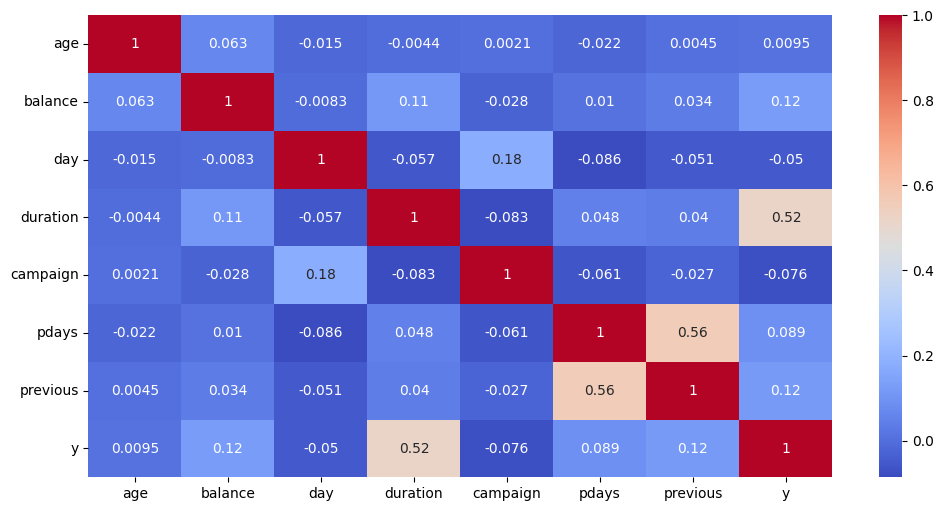


---- Correlation with Target Variable ----
y           1.000000
duration    0.519283
balance     0.122513
previous    0.119552
pdays       0.089277
age         0.009523
day        -0.049625
campaign   -0.075829
Name: y, dtype: float64


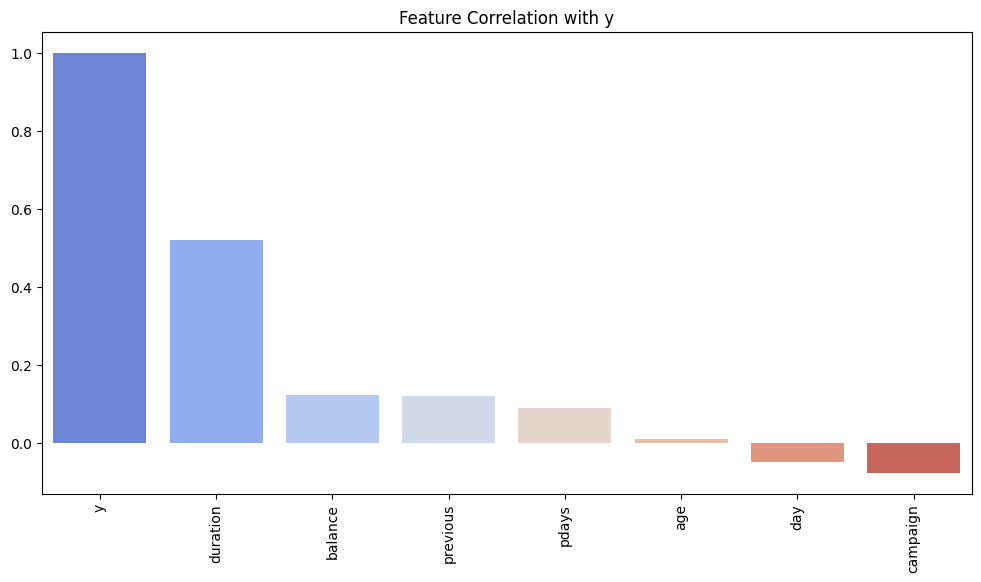


---- Distribution----


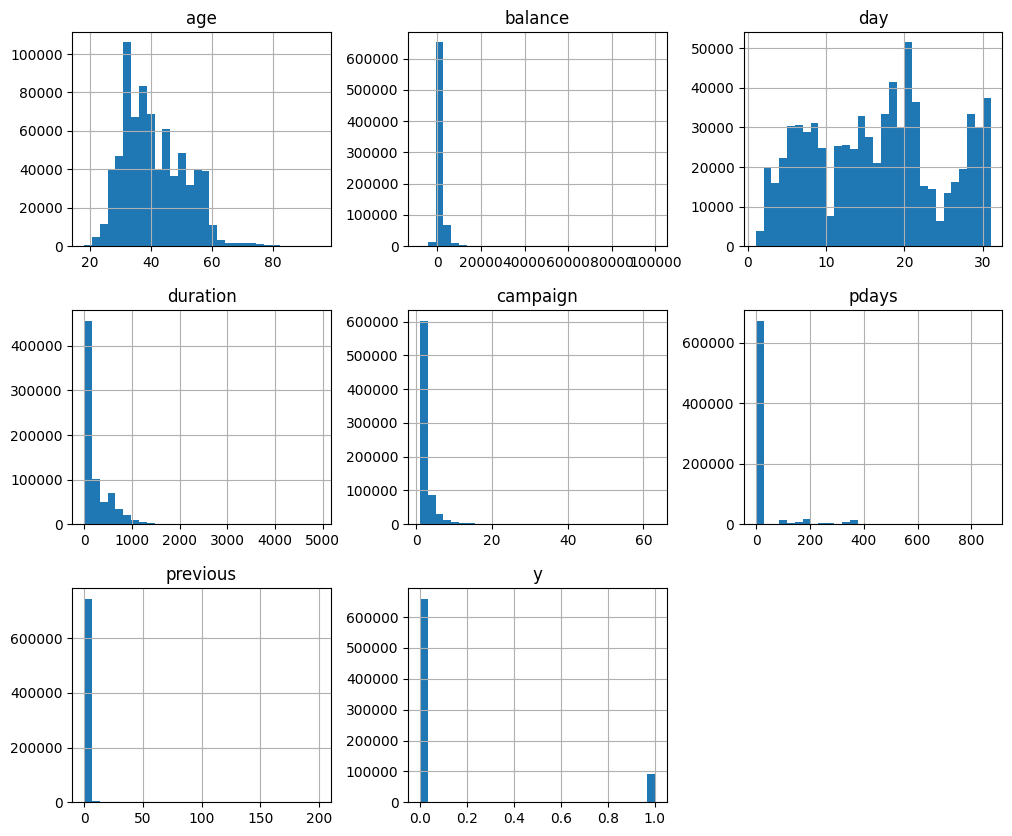


---- Box-plot for Outliers ----


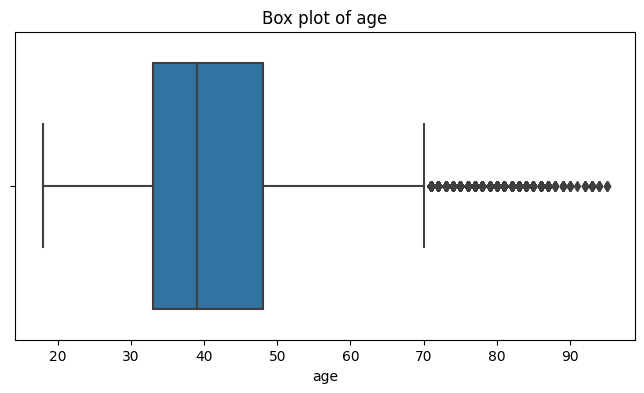

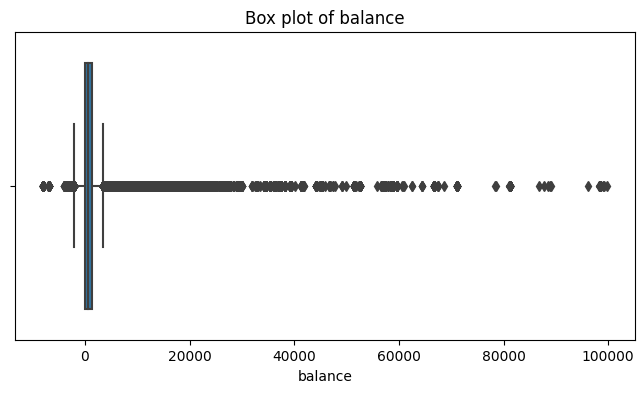

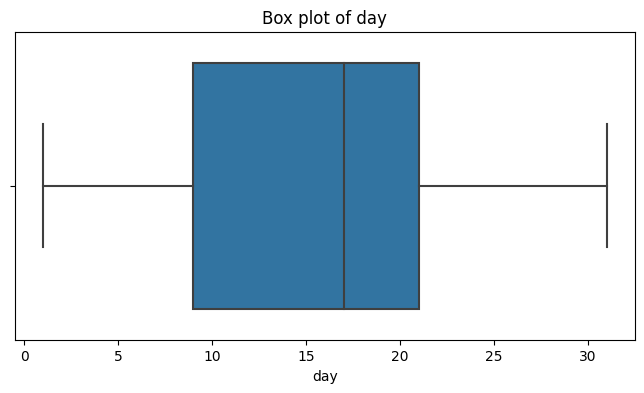

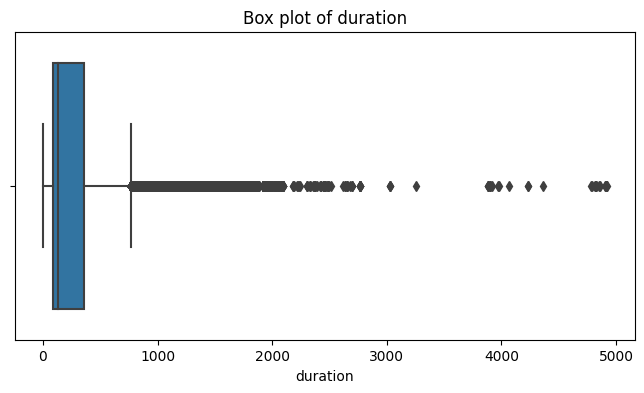

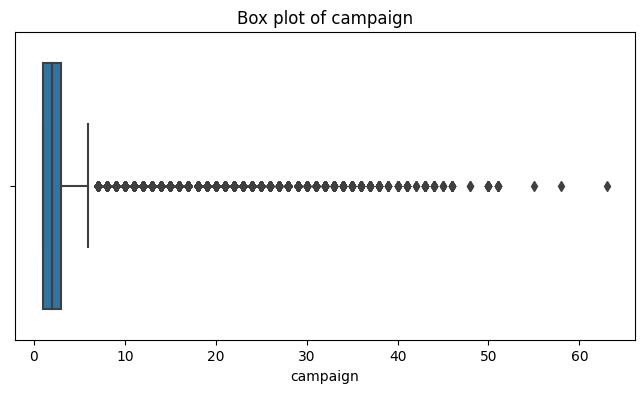

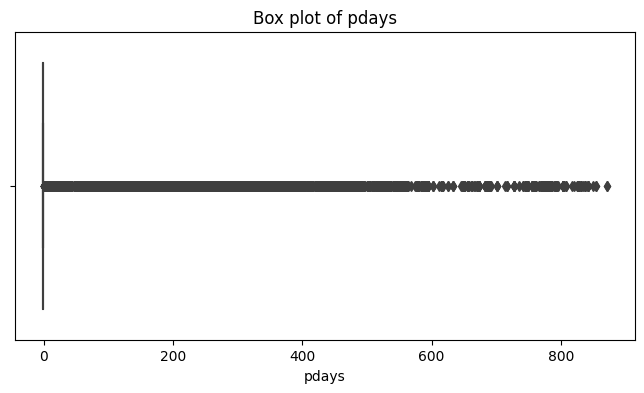

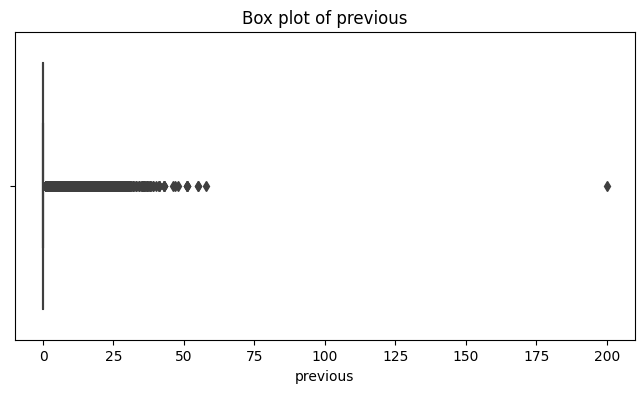

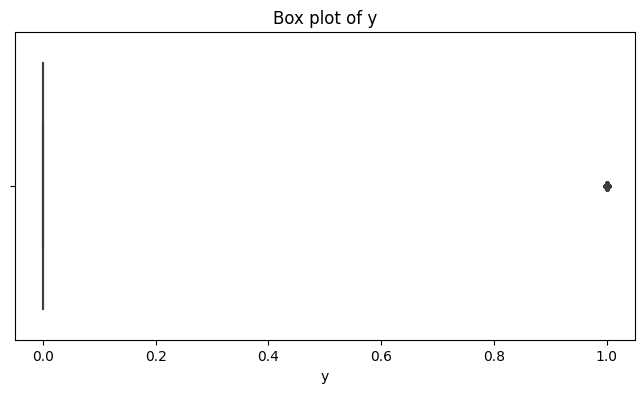


---- Value Counts for Categorical Columns ----

Value counts for job:
job
management       175541
blue-collar      170498
technician       138107
admin.            81492
services          64209
retired           35185
self-employed     19020
entrepreneur      17718
unemployed        17634
housemaid         15912
student           11767
unknown            2917
Name: count, dtype: int64

Value counts for marital:
marital
married     480759
single      194834
divorced     74407
Name: count, dtype: int64

Value counts for education:
education
secondary    401683
tertiary     227508
primary       99510
unknown       21299
Name: count, dtype: int64

Value counts for default:
default
no     737151
yes     12849
Name: count, dtype: int64

Value counts for housing:
housing
yes    411288
no     338712
Name: count, dtype: int64

Value counts for loan:
loan
no     645023
yes    104977
Name: count, dtype: int64

Value counts for contact:
contact
cellular     486655
unknown      231627
telephone   

In [7]:
eda_pipe(train,test)

The data is highly imbalanced

# Data Preprocessing

In [8]:
from sklearn.preprocessing import LabelEncoder

def data_preprocessing_pipeline(df_train, df_test) :

    #Get categorical columns from data (Both train and test have same features)
    cat_cols = df_train.select_dtypes(include="object").columns.to_list()

    cat_unique_val = {col: df_train[col].nunique() for col in cat_cols}
    
    for col in cat_cols :

        #Fill missing values 
        df_train[col] = df_train[col].fillna("missing")
        df_test[col] = df_test[col].fillna("missing")
        
        if 2 < cat_unique_val[col] <= 4 :
            train_ohe = pd.get_dummies(df_train[col],prefix=col)
            test_ohe = pd.get_dummies(df_test[col],prefix=col)

            train_ohe, test_ohe = train_ohe.align(test_ohe,join='left',axis=1,fill_value=0)

            df_train.drop(columns = [col],inplace = True)
            df_test.drop(columns = [col],inplace = True)
            df_train = pd.concat([df_train, train_ohe], axis = 1)
            df_test = pd.concat([df_test, test_ohe], axis = 1)

        elif cat_unique_val[col] > 4 :
            le = LabelEncoder()
            combined = pd.concat([df_train[col],df_test[col]],axis=0)
            le.fit(combined)
            df_train[col] = le.transform(df_train[col])
            df_test[col] = le.transform(df_test[col])

    return df_train, df_test

In [9]:
train,test = data_preprocessing_pipeline(train,test)

In [10]:
def convert(df):
    # 1. Convert all boolean columns to 1/0
    bool_cols = df.select_dtypes(include='bool').columns
    df[bool_cols] = df[bool_cols].astype(int)

    # 2. Convert all object columns with yes/no to 1/0
    obj_cols = df.select_dtypes(include='object').columns
    for col in obj_cols:
        unique_vals = df[col].dropna().str.lower().str.strip().unique()
        if set(unique_vals) == {"yes", "no"}:
            df[col] = df[col].str.lower().str.strip().map({"yes": 1, "no": 0})
    
    return df

In [11]:
train = convert(train)
test = convert(test)

In [12]:
!pip install imbalanced-learn==0.10.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0


In [13]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
import lightgbm as lgb

# Stratified K-Fold CV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

X = train.drop("y",axis=1)
y = train["y"]

for train_idx, val_idx in skf.split(X, y):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # Apply SMOTE only on training set
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    # LightGBM with GPU support
    model = lgb.LGBMClassifier(
        boosting_type='gbdt',
        objective='binary',
        metric='auc',
        learning_rate=0.05,
        num_leaves=128,
        max_depth=-1,
        n_estimators=1000,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.1,
        reg_lambda=0.1,
        random_state=42,
        device='gpu',
        gpu_platform_id=0,
        gpu_device_id=0
    )

    # Callbacks for early stopping & logging
    callbacks=[lgb.early_stopping(50), lgb.log_evaluation(100)]

    # Train model
    model.fit(
        X_train_res, y_train_res,
        eval_set=[(X_val, y_val)],
        eval_metric='auc',
        callbacks=callbacks
    )

[LightGBM] [Info] Number of positive: 527609, number of negative: 527609
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1008
[LightGBM] [Info] Number of data points in the train set: 1055218, number of used features: 26
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...


1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.


[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 10 dense feature groups (12.08 MB) transferred to GPU in 0.017070 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 50 rounds
[100]	valid_0's auc: 0.960399
[200]	valid_0's auc: 0.965022
[300]	valid_0's auc: 0.966354
[400]	valid_0's auc: 0.966926
[500]	valid_0's auc: 0.967191
[600]	valid_0's auc: 0.9674
[700]	valid_0's auc: 0.967566
[800]	valid_0's auc: 0.967675
[900]	valid_0's auc: 0.967721
[1000]	valid_0's auc: 0.967779
Did not meet early stopping. Best iteration is:
[975]	valid_0's auc: 0.967785
[LightGBM] [Info] Number of positive: 527609, number of negative: 527609
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1007
[LightGBM] [Info] Number of data points in the train set: 1055218, number of used features: 26
[LightGBM] [Info] Using req

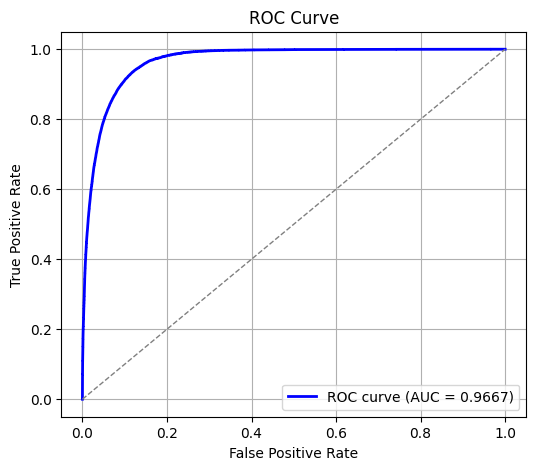

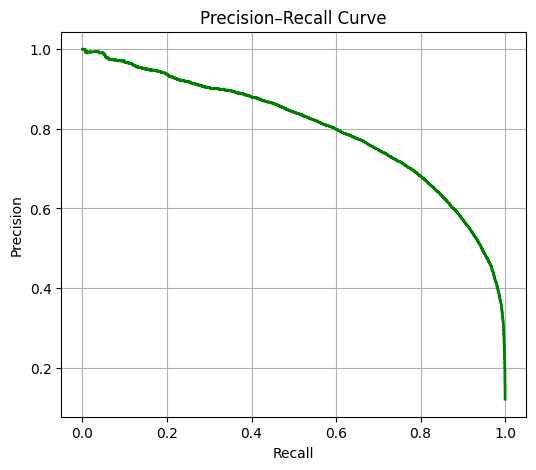

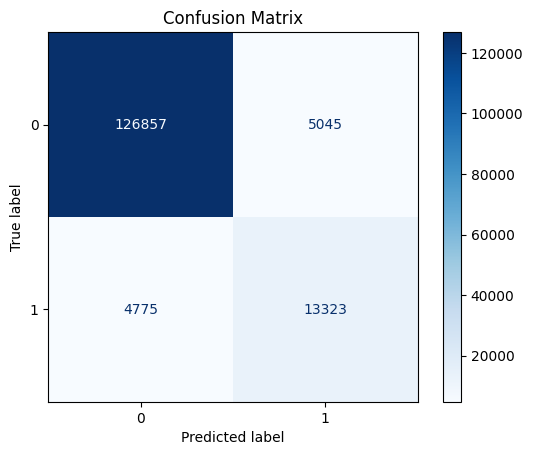

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay


# Get predicted probabilities and labels
y_proba = model.predict_proba(X_val)[:, 1]  # Probability for positive class
y_pred = (y_proba >= 0.5).astype(int)       # Threshold at 0.5 (tune if needed)

# ======================
# ROC Curve
# ======================
fpr, tpr, _ = roc_curve(y_val, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# ======================
# Precision–Recall Curve
# ======================
precision, recall, _ = precision_recall_curve(y_val, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve')
plt.grid(True)
plt.show()

# ======================
# Confusion Matrix
# ======================
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [15]:
id = sub["id"]
pred = model.predict(test)

submission = pd.DataFrame({
    "id" : id,
    "y" : pred
})

submission.to_csv("submission.csv", index=False)